In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
# %matplotlib inline
import datetime as dt

In [42]:
data=pd.read_csv('master.csv')
df = data.copy()

In [45]:
data.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [46]:
df.shape

(27820, 14)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Country and year are in the same filed, must be seperated


In [34]:
df.describe().T

count          mean           std       min        25%  \
year                27820.0  2.001258e+03  8.469055e+00  1985.000   1995.000   
suicides_no         27820.0  2.425744e+02  9.020479e+02     0.000      3.000   
population          27820.0  1.844794e+06  3.911779e+06   278.000  97498.500   
suicides/100k pop   27820.0  1.281610e+01  1.896151e+01     0.000      0.920   
HDI for year         8364.0  7.766011e-01  9.336671e-02     0.483      0.713   
gdp_per_capita ($)  27820.0  1.686646e+04  1.888758e+04   251.000   3447.000   

                           50%          75%           max  
year                  2002.000     2008.000  2.016000e+03  
suicides_no             25.000      131.000  2.233800e+04  
population          430150.000  1486143.250  4.380521e+07  
suicides/100k pop        5.990       16.620  2.249700e+02  
HDI for year             0.779        0.855  9.440000e-01  
gdp_per_capita ($)    9372.000    24874.000  1.263520e+05

In [47]:
df.describe(exclude='number').T


count unique            top   freq
country             27820    101    Netherlands    382
sex                 27820      2           male  13910
age                 27820      6    15-24 years   4642
country-year        27820   2321    Ecuador1988     12
 gdp_for_year ($)   27820   2321  5,788,368,511     12
generation          27820      6   Generation X   6408
Year                27820     32           2009   1068
country2            27820    101    Netherlands    382

In [48]:
df['Year'] = df['country-year'].str[-4:]
df['country2'] = df['country-year'].str[:-4]


In [37]:
df.describe().T

count          mean           std       min        25%  \
year                27820.0  2.001258e+03  8.469055e+00  1985.000   1995.000   
suicides_no         27820.0  2.425744e+02  9.020479e+02     0.000      3.000   
population          27820.0  1.844794e+06  3.911779e+06   278.000  97498.500   
suicides/100k pop   27820.0  1.281610e+01  1.896151e+01     0.000      0.920   
HDI for year         8364.0  7.766011e-01  9.336671e-02     0.483      0.713   
gdp_per_capita ($)  27820.0  1.686646e+04  1.888758e+04   251.000   3447.000   

                           50%          75%           max  
year                  2002.000     2008.000  2.016000e+03  
suicides_no             25.000      131.000  2.233800e+04  
population          430150.000  1486143.250  4.380521e+07  
suicides/100k pop        5.990       16.620  2.249700e+02  
HDI for year             0.779        0.855  9.440000e-01  
gdp_per_capita ($)    9372.000    24874.000  1.263520e+05

In [68]:
df.head()


country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  Year  
0                 796     Generation X  1987  
1                 796           Silent  1987  
2                 796     Generation X  1987  
3                 796  G.I. Generation  1987  
4                 796          Boomers  1987

In [88]:
df[df['HDI for year'].isna()]

country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27755  Uzbekistan  2009  female    75+ years            7      318983   
27756  Uzbekistan  2009  female  35-54 years           65     3263931   
27757  Uzbekistan  2009  female  55-74 years           15     1105076   
27758  Uzbekistan  2009    male   5-14 years           37     2805898   
27759  Uzbekistan  2009  female   5-14 years           18     2678474   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0                   6.71     Albania1987           NaN      2,156,624,900   
1                   5.19     Albania1987           NaN      2,156,624,900   
2                   4.83     Albania1987           NaN      2,156,624,900   
3                   4.59     Albania1987           NaN      2,156,624,900   
4                   3.28     Albania1987           NaN      2,156,624,900   
...                  ...             ...           ...                ...   
27755               2.19  Uzbekistan2009           NaN     33,689,223,673   
27756               1.99  Uzbekistan2009           NaN     33,689,223,673   
27757               1.36  Uzbekistan2009           NaN     33,689,223,673   
27758               1.32  Uzbekistan2009           NaN     33,689,223,673   
27759               0.67  Uzbekistan2009           NaN     33,689,223,673   

       gdp_per_capita ($)       generation  Year  
0                     796     Generation X  1987  
1                     796           Silent  1987  
2                     796     Generation X  1987  
3                     796  G.I. Generation  1987  
4                     796          Boomers  1987  
...                   ...              ...   ...  
27755                1332           Silent  2009  
27756                1332          Boomers  2009  
27757                1332           Silent  2009  
27758                1332     Generation Z  2009  
27759                1332     Generation Z  2009  

[19456 rows x 13 columns]

In [100]:
df['country-year']
#df['HDI for year'].average()
df.pivot_table(index='country' , columns = 'Year', values='HDI for year',
               
               aggfunc='mean'
              )


Year                   1985   1990   1995   2000   2005   2010   2011   2012  \
country                                                                        
Albania                 NaN    NaN  0.619  0.656  0.695  0.722    NaN    NaN   
Antigua and Barbuda     NaN    NaN    NaN    NaN    NaN    NaN    NaN  0.781   
Argentina             0.694  0.705  0.731  0.762  0.775  0.811  0.818  0.831   
Armenia                 NaN  0.632  0.605  0.648    NaN  0.721  0.723  0.728   
Australia               NaN  0.865  0.882  0.898    NaN  0.927  0.930  0.932   
...                     ...    ...    ...    ...    ...    ...    ...    ...   
United Arab Emirates    NaN    NaN    NaN    NaN  0.822  0.828    NaN    NaN   
United Kingdom        0.753  0.773  0.837  0.865  0.890  0.906  0.901  0.901   
United States         0.841  0.859  0.876  0.883  0.897  0.909  0.911  0.912   
Uruguay               0.667  0.692  0.711  0.742  0.756  0.780    NaN  0.788   
Uzbekistan              NaN    NaN    NaN  0.594  0.625  0.655  0.661  0.668   

Year                   2013   2014  
country                             
Albania                 NaN    NaN  
Antigua and Barbuda   0.781  0.783  
Argentina             0.833  0.836  
Armenia               0.731  0.733  
Australia             0.933  0.935  
...                     ...    ...  
United Arab Emirates    NaN    NaN  
United Kingdom        0.902  0.907  
United States         0.913  0.915  
Uruguay               0.790  0.793  
Uzbekistan            0.672  0.675  

[90 rows x 10 columns]

In [79]:
df[df['HDI for year'].isna()]['country'].value_counts()

Republic of Korea      372
Puerto Rico            372
Russian Federation     324
Antigua and Barbuda    288
Turkmenistan           288
                      ... 
Nicaragua               12
Dominica                12
Macau                   12
Cabo Verde              12
Mongolia                10
Name: country, Length: 100, dtype: int64

In [102]:
def histogram_boxplot(feature , figsize=(15,10) , bins=None):
    f2,(ax_box2 , ax_hist2) = plt.subplots(nrows=2,
                                          sharex=True,
                                          gridspec_kw={"height_ratios":(.25,.75)},
                                          figsize=figsize)
    sns.boxplot(feature,ax=ax_box2, showmeans=True,color='red')
    sns.distplot(feature , kde=F,ax = ax_hist2 , bins = bins) if bins else sns.distplot(feature,kde=False,ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature),color='g',linestyle = '--')
    ax_hist2.axvline(np.median(feature),color='black',linestyle = '-')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
 12  Year                27820 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.8+ MB


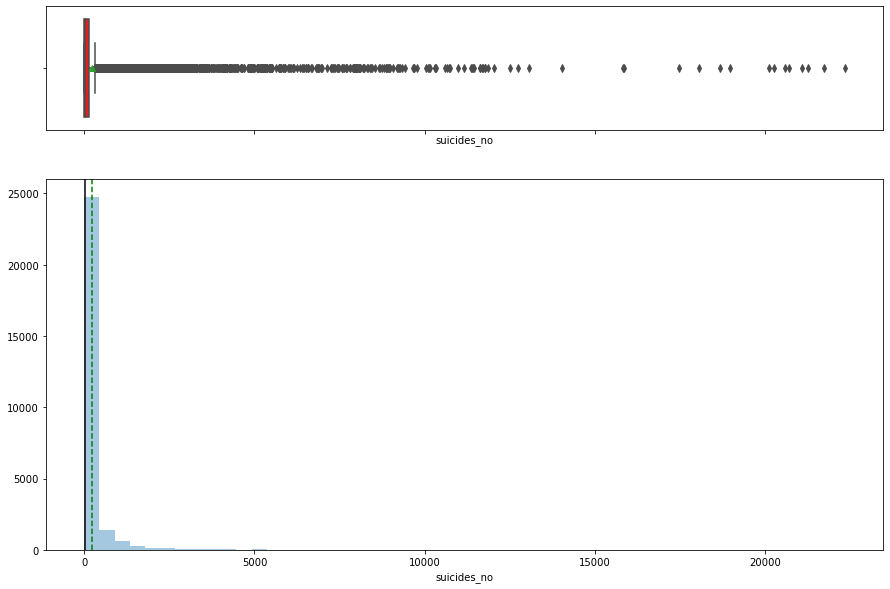

In [106]:
histogram_boxplot(df.suicides_no)

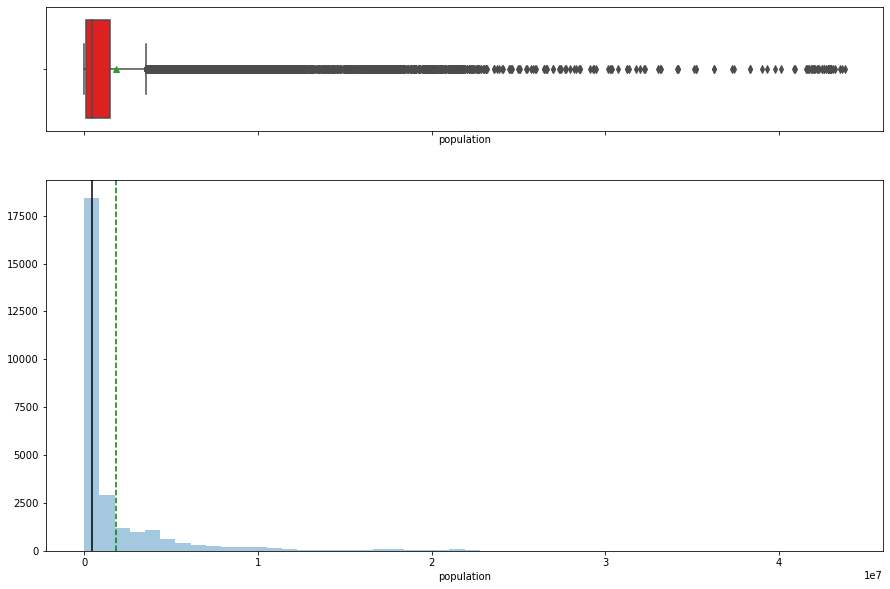

In [105]:
histogram_boxplot(df.population)

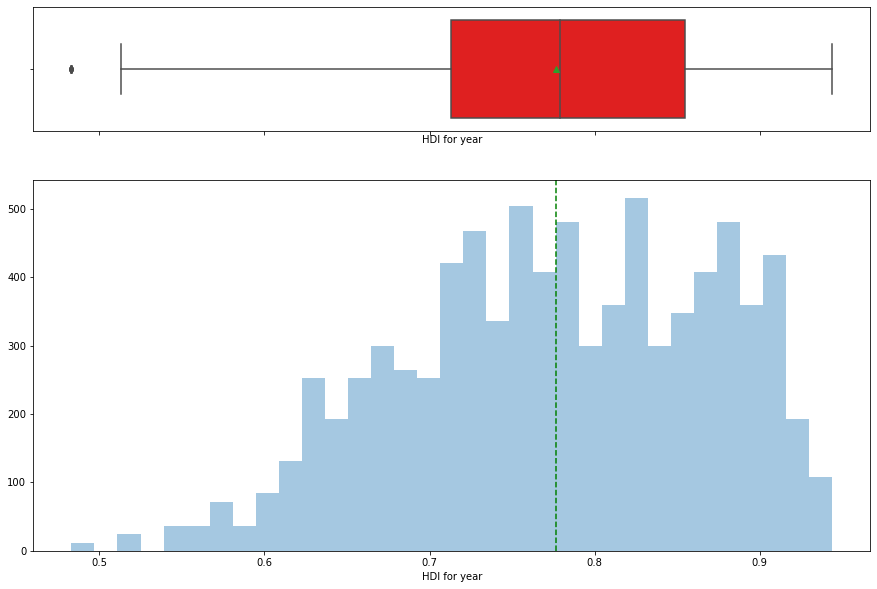

In [108]:
histogram_boxplot(df['HDI for year'] )

In [118]:
def bar_perc(data,z):
    total = len(data[z])
    plt.figure(figsize=(15,5))
    ax=sns.countplot(data[z],palette='Paired', orient="h")
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 *p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y=p.get_y() + p.get_height()
        
        ax.annotate(percentage , (x,y),size=12)
    plt.show()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
 12  Year                27820 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.8+ MB


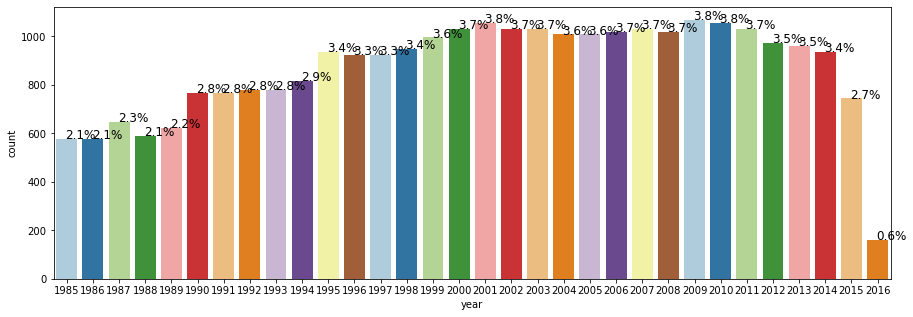

In [120]:
df.info()
bar_perc(df, 'year')

In [124]:
df.info()
df['sex'].value_counts()
#bar_perc(df, 'sex')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
 12  Year                27820 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.8+ MB


male      13910
female    13910
Name: sex, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='suicides_no'>

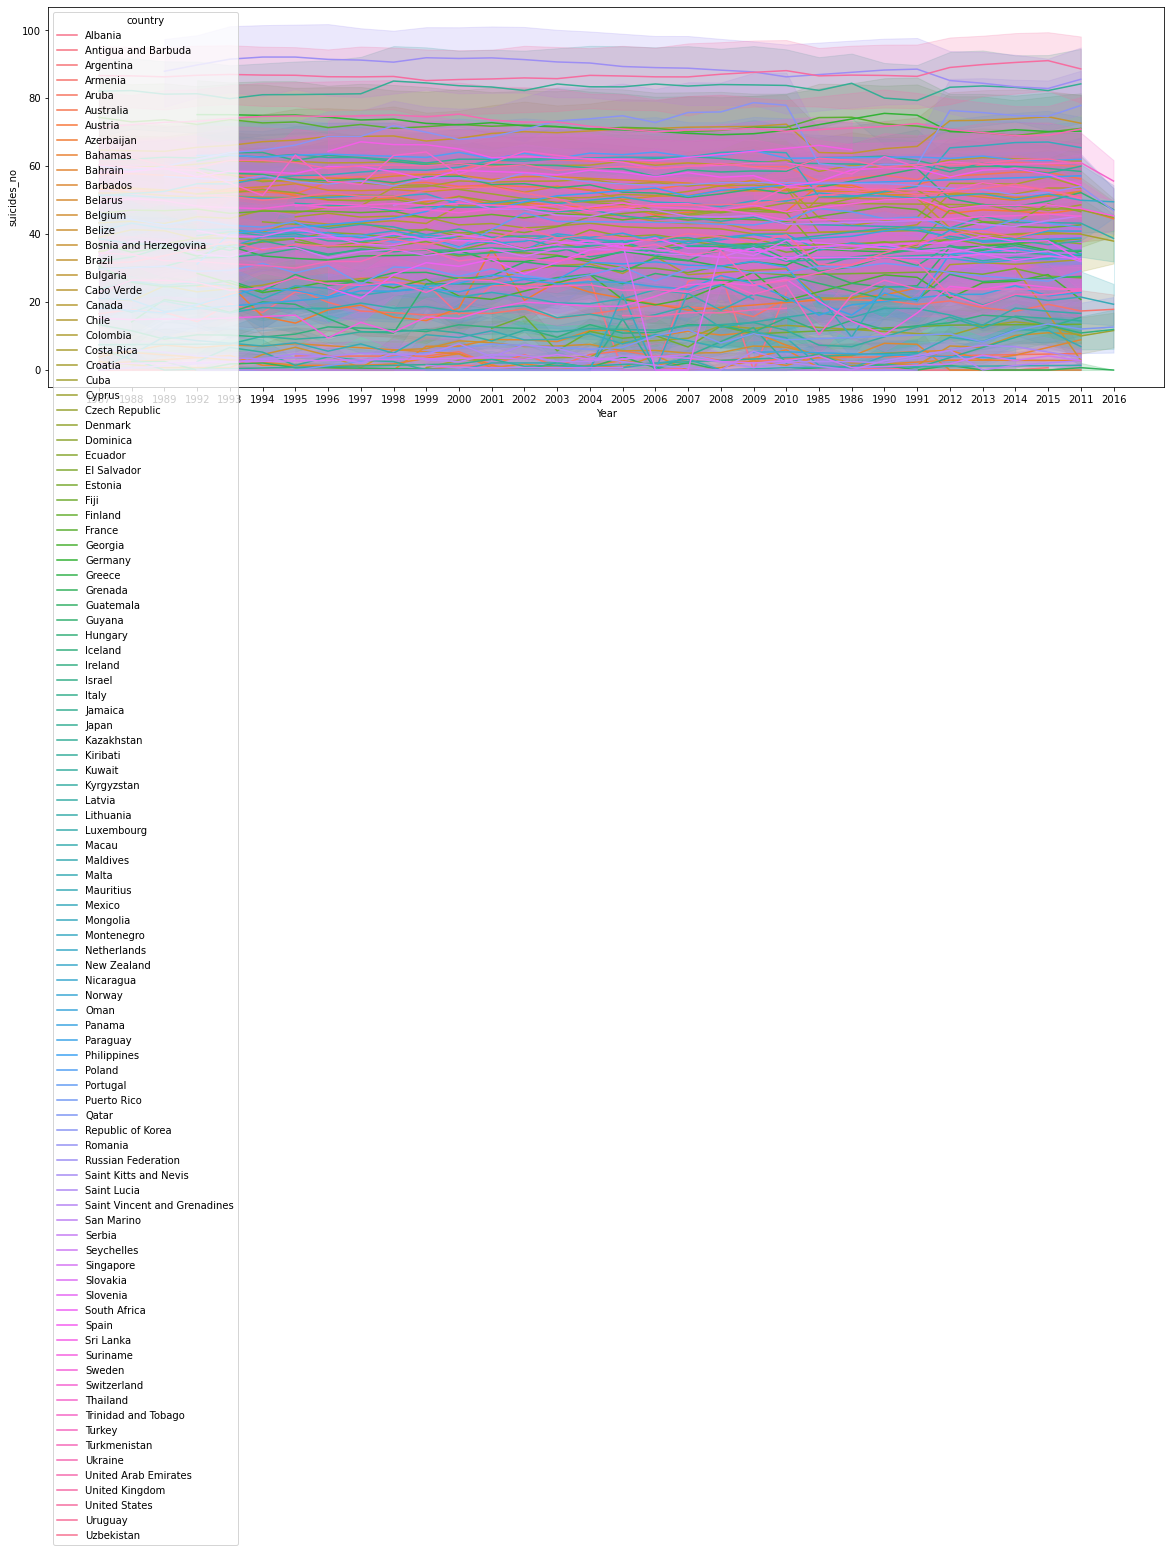

In [138]:
plt.figure(figsize=(20,7))
sns.lineplot(x=df.Year , y=np.log1p(df.suicides_no) , estimator='sum',hue=df.country)

In [139]:
from pandas_profiling import ProfileReport
# Use the original dataframe, so that the original features are considered
prof = ProfileReport(data)
# to view report created by pandas profiling
prof

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]